# 文字处理与Amazon评论NLP分析案例
1. python文字处理基本操作回顾
2. ASCII,unicode解码与编码,utf-8
3. nltk工具包与特朗普的任职演讲
4. Amazon评论分析案例
    * 4.1 读取文字
    * 4.2 整理标签
    * 4.3 清理文字并建语料库
    * 4.4 建模
    * 4.5 模型结果

In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 1. python英文文字处理基本操作回顾

* 转义字符 \
* 文字拼接 s1+s2
* 文字长度 s.len()
* 取字母 s[3]
* 大小写 s.lower(), s.upper()
* 去除末尾空格 s.strip()
* 是不是字母s.isalpha()
* 是不是数字s.isdigit()
* 是不是空格s.isspace()
* 从哪里开始 s.startswith('other')
* 从哪里结束 s.endswith('other') 
* 查找相应字符 s.find('other')，返回首个字母的序号，若没有，就返回-1
* 替换 s.replace('old', 'new') 
* s.split(',')
* ' '.join(list) 

* 用\做转义符, 将文字中的特殊符号显示出来
    * word = 'I'm yours'
    * word = 'I\'m yours'

In [4]:
word = "i'm yours"

* 文字的拼接
    * words = 'Hello'+','+'Word'

* 文字长度

* 取字母 s[3]

* 大小写 s.lower(), s.upper()

* 去除末尾空格 s.strip()

* 是不是字母s.isalpha(),是不是数字s.isdigit(),是不是空白s.isspace()

* 从哪里开始 s.startswith('other')


* 从哪里结束 s.endswith('other')

* 查找文字
    * sentens='I love beijing'
    * if 'beijing' in sentens
    * sentens.find('beijing')

* 替换 s.replace('old', 'new')

* 分割句子（英文）

In [ ]:
sentens.split()

* 将分散的单词拼成句子 ' '.join(list)

* 打开文件
    * with open('trump.txt') as f

In [6]:
with open('trump.txt',encoding='utf-8') as f:
    for line in f:
        print(line)
        

Ronald Reagan Building and International Trade Center



Washington, D.C.



2:03 P.M. EST



THE PRESIDENT:  Thank you very much.  Thank you.  Please.  I want to thank Vice President Pence, along with the many members of my Cabinet here with us today.



I also want to thank all of the dedicated professionals — military, civilian, and law enforcement — who devote their lives to serving our nation.  In particular, I want to recognize General Dunford and the members of the Joint Chiefs of Staff.  Thank you, thank you, thank you.  (Applause.)



In addition, we are honored to be joined by House Majority Leader Kevin McCarthy, Homeland Security Chairman Mike McCaul, and Senate Majority Whip John Cornyn.  Thank you very much.  Thank you for being here.  Thank you.  Thank you.  (Applause.)



Let me begin by expressing our deepest sympathies and most heartfelt prayers for the victims of the train derailment in Washington State.  We are closely monitoring the situation and coordinating with 

## 2. ASCIIunicode解码与编码
* ASCII
* unicode

### 2.1 ASCII
    * 32-47标点空格等符号
    * 48-57为0到9十个阿拉伯数字
    * 65-90为26个大写英文字母
    * 97-122号为26个小写英文字母


In [7]:
chr(47)

'/'

In [8]:
# ASCII转为10进制的数
ord('a') 

97

In [9]:
# 10进制数转为ASCII码
chr(97)

'a'

In [ ]:
# 进制转换 将16进制改为10进制

In [ ]:
# print(int('cf',16)) # 16进制下的\xcf

In [ ]:
# print(int('e6',16)) #将16进制表达转成10进制的表达
# print(bin(int('e6',16))) # 将16进制的表达先转成10进制，再转成2进制的表达
# print(hex(230)) # 将10进制表达转回16进制的表达

### 2.2 Unicode
ASCII码不够用啊 127能干啥？

* Unicode的发展：
    * 早期2个字节65536 
    * 后期4个字节
    * 用得最多的是哪些？
    * 如何表示这些序号最省空间？utf-8字节长度可变编码

|unicode符号的序号|unicode对应的字符|
|-----------------|:-----------------|
|\u6211| 我|
|\u7231|爱|
|\u5317|北|
|\u4eac|京|
|\u5929|天|
|\u5b89|安|
|\u95e8|门|


<img src='decode.png',width=500>

* UTF-8
    * UTF-8编码规则：
    
|unicode符号的序号范围（十六进制）|utf-8编码（二进制）|
|-----------------|:-----------------|
|0000 0000 - 0000 007F| 0xxxxxxx|
|0000 0080 - 0000 07FF| 110xxxxx 10xxxxxx|
|0000 0800 - 0000 FFFF| 110xxxxx 10xxxxxx 10xxxxxx|
|0001 0000 - 0010 FFFF| 11110xxx 10xxxxxx 10xxxxxx 10xxxxxx|


In [10]:
print(u'\u0034')

4


### unicode的中文
* 变量可以保存中文的unicode序号，python2可显示unicode的序号，python3只显示对应的符号
* 使用print函数直接打印 中文字符的unicode序号，会打印出对应的字符


In [11]:
a=u'我'
a

'我'

In [12]:
a=u'\u6211'
a
# python 3里面直接显示unicode

'我'

In [13]:
a=u'\u6211'
print(a)

我


In [14]:
c=u'㫸'
c


'㫸'

In [15]:
data = u"我爱北京天安门"
data

'我爱北京天安门'

In [16]:
data_in_a_file = data.encode('utf-8')
data_in_a_file

b'\xe6\x88\x91\xe7\x88\xb1\xe5\x8c\x97\xe4\xba\xac\xe5\xa4\xa9\xe5\xae\x89\xe9\x97\xa8'

In [17]:
data_in_a_file.decode('utf-8')

'我爱北京天安门'

In [18]:
for unicode_zi in data_in_a_file.decode('utf-8'):
    print(unicode_zi)

我
爱
北
京
天
安
门


### 英文
* 在python 2, 3下都是直接显示实际字符，不显示unicode的序号

In [19]:
tmp_h = u"Hello" #基本无影响，不显示unicode的序号，只显示实际字符
tmp_h

'Hello'

In [20]:
a=u'\u0048'
a

'H'

## 3. nltk工具
分析特朗普总统任职演讲稿
* nltk一般使用
    * 共同出现的上下文 text.concordance
    * 词语的分布图 text.dispersion_plot
    
* 读取并简单计算特朗普总统的任职演讲稿

### 3.1 nltk的一般使用

In [21]:
import nltk
from nltk.book import *
import matplotlib.pyplot as plt
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [22]:
text7

<Text: Wall Street Journal>

* 找出week在第二个语料库中的上下文 text2.concordance('week')

In [23]:
text2.concordance('week')

Displaying 25 of 25 matches:
 Elinor should not be exposed another week to such insinuations . In this state 
 riches , was led before the end of a week to hope and expect it ; and secretly 
; and they had not known each other a week , I believe , before you were certain
" If he is not here by the end of the week , I shall go after him ." " Ay , so d
. One evening in particular , about a week after Colonel Brandon left the countr
is intentions . One morning , about a week after his leaving the country , Maria
ion it . CHAPTER 19 Edward remained a week at the cottage ; he was earnestly pre
ut still , go he must . Never had any week passed so quickly -- he could hardly 
 , he must leave them at the end of a week , in spite of their wishes and his ow
 go , for the Westons come to us next week you know . It was quite a sudden thin
t in a scene of similar distress last week , some apricot marmalade had been suc
was in full force at the end of every week , they were prevailed on to stay near

* 画出第四个语料库中关键词的分布：text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

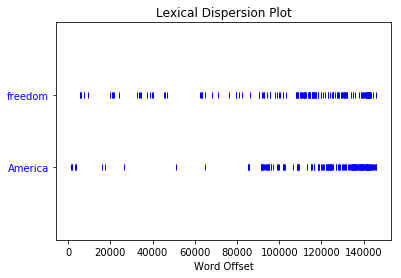

In [25]:
text4.dispersion_plot(["freedom", "America"])

* 数一下第五个语料库中表情符号的个数：text5.count('lol')

In [26]:
text5.count('lol')

704

### 3.2 计算特朗普的总统任职演讲

* 读取
* 分词
* 制作自己的nltk text对象
* 绘制关键词语分布图
* 查找最热的长度为2的短语
* 计算词频
* 频率最高的词语或符号
* 累计统计图
* 用词多样化的程度

In [28]:
# 读取
with open('trump.txt','r', encoding='utf-8') as f:
    trump=f.read()

* 分词

tokens = nltk.word_tokenize(trump)

text = nltk.Text(tokens)

In [30]:
tokens = nltk.word_tokenize(trump)
text = nltk.Text(tokens)

* 绘制关键词语分布图

text.dispersion_plot(['civilian','people','American'])

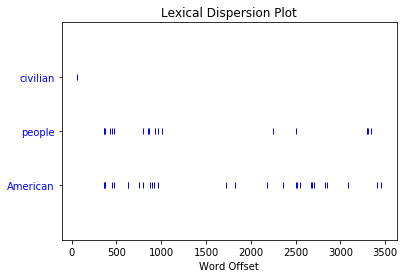

In [31]:
text.dispersion_plot(['civilian','people','American'])

* 查找最热的长度为2的短语

text.collocations()

In [32]:
text.collocations()

United States; American people; Great job; Middle East; P.M. EST; all-
time high; stock market; taken care; North Korea; American greatness;
Homeland Security; National Security; Security Strategy; national
security; made clear; strategy recognizes; coming back; fair share;
first time; lost confidence


* 计算词频

text_fq = nltk.FreqDist(text)

text_fq.most_common(20)

In [33]:
text_fq = nltk.FreqDist(text)
text_fq.most_common(20)

[('.', 216),
 (',', 190),
 ('and', 132),
 ('the', 129),
 ('to', 97),
 ('our', 92),
 ('of', 84),
 ('we', 55),
 ('a', 47),
 ('in', 43),
 ('are', 40),
 ('is', 40),
 ('for', 39),
 ('that', 37),
 ('We', 36),
 ('have', 29),
 ('you', 28),
 ('American', 28),
 ('will', 21),
 ('Thank', 20)]

* 词汇累计统计图

text_fq.plot(30,cumulative=True)

* 词汇丰富的程度

In [ ]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [ ]:
lexical_diversity(text) #普朗特

In [ ]:
lexical_diversity(text2) #简 奥斯丁

In [ ]:
lexical_diversity(text4) #所有总统任职演说

In [ ]:
lexical_diversity(text7) # Wall Street J

## 4. Amazon评论分析

* 大概思路：利用正负面描述的**词语频率**预测Amazon的商品评价
    1. 读取文字描述，查看大概数据情况
    2. 整理标签
    3. 整理summary文字，并建立语料库
    4. 建模
    5. 结果

In [34]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn as sk
import os,time,re,string
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics 

%matplotlib inline

### 4.1. 读取文字描述，查看大概数据情况

* review_raw = pd.read_csv('../../Amazon/amazon-fine-food-reviews/Reviews.csv')
* review_raw.info()

In [55]:
review_raw = pd.read_csv('amazon-fine-food-reviews/Reviews.csv')

In [36]:
review_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [52]:
n_samplesr = review_raw.shape[0]
n_samplesr

568454

In [56]:
review = review_raw.dropna()

* 去掉Null值

review = review_raw.dropna()

In [57]:
review.shape

(568411, 10)

In [40]:
#review = review_raw.dropna()

### 4.2 整理label, 作为正负评价的标签


* 将结果分为两类: positive (score > 3) and negative (score <= 3)

In [58]:
label = review['Score'].apply(lambda x: 1 if x> 3 else 0)

### 4.3 整理summary文字栏

* 去标点等符号
* 分词
* stopwords,去掉stopwords
* 词干提取Stemming与词形还原Lemmatization
* 清洗结果对比

In [59]:
summary = review['Summary']
summary.head(10)

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

#### 4.3.1 数据清洗: 去掉标点符号

* 不要忘记import string
* import string
* string.punctuation

In [61]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
# Python3 的用法
trantable = str.maketrans("","",string.punctuation)
def data_clean(text):
    text = text.lower()
    #要去掉的元素放到 text.translate的第二个参数中
    text_clean = text.translate(trantable)
    return text_clean

In [63]:
# 例子: 
s = '数据科学##* &@好玩,@*$ @*我*@#!要好好学'
print(s)
print(data_clean(s))

数据科学##* &@好玩,@*$ @*我*@#!要好好学
数据科学 好玩 我要好好学


* 对summary执行data_clearn操作
* summary = summary.apply(lambda x: data_clean(x))

In [64]:
summary = summary.apply(lambda x: data_clean(x))

In [65]:
summary

0                                     good quality dog food
1                                         not as advertised
2                                       delight says it all
3                                            cough medicine
4                                               great taffy
5                                                nice taffy
6               great  just as good as the expensive brands
7                                     wonderful tasty taffy
8                                                yay barley
9                                          healthy dog food
10                          the best hot sauce in the world
11        my cats love this diet food better than their ...
12                     my cats are not fans of the new food
13                                         fresh and greasy
14                              strawberry twizzlers  yummy
15                   lots of twizzlers just what you expect
16                                      

#### 4.3.2 分词 tokenize

In [66]:
from nltk import word_tokenize

In [67]:
# 取一部分做一个展示
demo = summary[:5000]

corpus_w_stopword = [word_tokenize(text) for text in demo]

In [90]:
corpus_w_stopword = [word_tokenize(text) for text in demo]

In [69]:
corpus_w_stopword

[['good', 'quality', 'dog', 'food'],
 ['not', 'as', 'advertised'],
 ['delight', 'says', 'it', 'all'],
 ['cough', 'medicine'],
 ['great', 'taffy'],
 ['nice', 'taffy'],
 ['great', 'just', 'as', 'good', 'as', 'the', 'expensive', 'brands'],
 ['wonderful', 'tasty', 'taffy'],
 ['yay', 'barley'],
 ['healthy', 'dog', 'food'],
 ['the', 'best', 'hot', 'sauce', 'in', 'the', 'world'],
 ['my',
  'cats',
  'love',
  'this',
  'diet',
  'food',
  'better',
  'than',
  'their',
  'regular',
  'food'],
 ['my', 'cats', 'are', 'not', 'fans', 'of', 'the', 'new', 'food'],
 ['fresh', 'and', 'greasy'],
 ['strawberry', 'twizzlers', 'yummy'],
 ['lots', 'of', 'twizzlers', 'just', 'what', 'you', 'expect'],
 ['poor', 'taste'],
 ['love', 'it'],
 ['great', 'sweet', 'candy'],
 ['home', 'delivered', 'twizlers'],
 ['always', 'fresh'],
 ['twizzlers'],
 ['delicious', 'product'],
 ['twizzlers'],
 ['please', 'sell', 'these', 'in', 'mexico'],
 ['twizzlers', 'strawberry'],
 ['nasty', 'no', 'flavor'],
 ['great', 'bargain', '

#### 4.3.3 Stopwords，去掉stopwords

In [91]:
from nltk import FreqDist
from nltk.corpus import stopwords

stopwords.words('english')

In [85]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

定义去除停用词的函数

In [92]:
def remove_stopword(text):
    return [word for word in text if word not in stopwords.words('english')]

去除停用词，创建新的词库

corpus_wo_stopword = [remove_stopword(text) for text in corpus_w_stopword]


In [93]:
corpus_wo_stopword = [remove_stopword(text) for text in corpus_w_stopword]

corpus_wo_stopword[:10]

- See the difference? 
- 去掉了 'not'这类词，这类用词会严重影响情感分析，可行的处理方式？

In [94]:
corpus_wo_stopword[:20]

[['good', 'quality', 'dog', 'food'],
 ['advertised'],
 ['delight', 'says'],
 ['cough', 'medicine'],
 ['great', 'taffy'],
 ['nice', 'taffy'],
 ['great', 'good', 'expensive', 'brands'],
 ['wonderful', 'tasty', 'taffy'],
 ['yay', 'barley'],
 ['healthy', 'dog', 'food'],
 ['best', 'hot', 'sauce', 'world'],
 ['cats', 'love', 'diet', 'food', 'better', 'regular', 'food'],
 ['cats', 'fans', 'new', 'food'],
 ['fresh', 'greasy'],
 ['strawberry', 'twizzlers', 'yummy'],
 ['lots', 'twizzlers', 'expect'],
 ['poor', 'taste'],
 ['love'],
 ['great', 'sweet', 'candy'],
 ['home', 'delivered', 'twizlers']]

corpus_wo_h = np.hstack(corpus_wo_stopword)

list.append()

list.extend()

In [95]:
corpus_wo_h = np.hstack(corpus_wo_stopword)


In [96]:
# 计算有多少不重复的词汇:
corpus_wo_h = np.hstack(corpus_wo_stopword)
corpus_w_h = np.hstack(corpus_w_stopword)

print("考虑停止词，不重复词汇有%d"%(len(set(corpus_w_h))))
print("不考虑停止次，不重复的词汇有%d"%(len(set(corpus_wo_h))))

考虑停止词，不重复词汇有3301
不考虑停止次，不重复的词汇有3187


#### 4.3.4 词干提取与词性还原

In [97]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

In [98]:
porter = PorterStemmer()
wnl = WordNetLemmatizer()

print("stemmer: 'eating' ->%d"%(porter.stem('eating')))

print("lemmatization: 'feet' -> %d"%(wnl.lemmatize('feet')))

In [101]:
print("stemmer: 'eating' ->%s"%(porter.stem('eating')))

stemmer: 'eating' ->eat


In [103]:
print("lemmatization: 'feet' -> %s"%(wnl.lemmatize('feet')))

lemmatization: 'feet' -> foot


* stem_wo = [porter.stem(word) for word in corpus_wo_h]
* lem_wo = [wnl.lemmatize(word) for word in corpus_wo_h]

In [104]:
stem_wo = [porter.stem(word) for word in corpus_wo_h]
lem_wo = [wnl.lemmatize(word) for word in corpus_wo_h]

#### 4.3.5 清洗结果对比

* 提取词干，还原词性

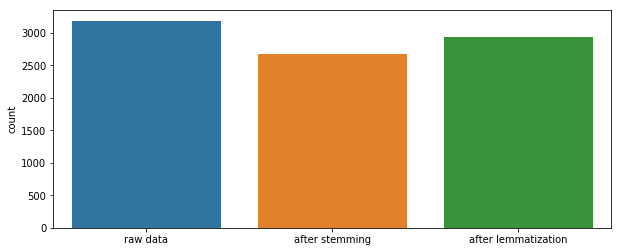

In [105]:
plt.figure(figsize=(10,4))
sns.barplot(x = ['raw data','after stemming', 'after lemmatization'], 
            y = [len(set(corpus_wo_h)), len(set(stem_wo)), len(set(lem_wo))]) 
plt.ylabel('count')
plt.show()

* 去除stopwords后的词频

In [111]:
fdist_wo = pd.DataFrame(list(FreqDist(corpus_wo_h).items()), columns=['单词without', '词频without'])
fdist_wo.sort_values(by = '词频without', inplace =True, ascending=False)

fdist_w = pd.DataFrame(list(FreqDist(corpus_w_h).items()), columns=['词with', '词频with'])
fdist_w.sort_values(by = '词频with', inplace =True, ascending=False)


* 可视化结果

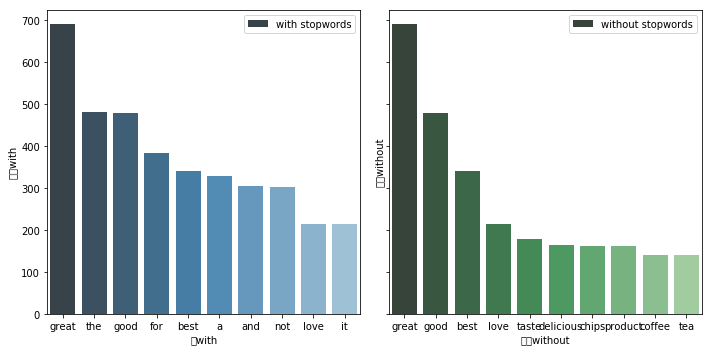

In [113]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize = (10,5))

sns.barplot(
    x = fdist_w['词with'][:10],
    y = fdist_w['词频with'][:10],
    palette='Blues_d',
    ax = ax1,
    label = 'with stopwords'
)
sns.barplot(x = fdist_wo['单词without'][:10],
           y = fdist_wo['词频without'][:10],
           palette='Greens_d',
           ax = ax2,
           label = 'without stopwords')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

#### 附：查看热门短语

In [114]:
from nltk import ngrams

In [115]:
def get_ngrams(text, n = 2):
    return ngrams(text, n)

In [116]:
s = 'I love data mining'

s_token = word_tokenize(s)
print(s_token)

print(list(get_ngrams(s_token)))

['I', 'love', 'data', 'mining']
[('I', 'love'), ('love', 'data'), ('data', 'mining')]


In [117]:
bigram_w = []
for token in corpus_w_stopword:
    bigram = nltk.bigrams(token)
    for item in bigram:
        bigram_w.append(item)
        
bigram_wo = []
for token in corpus_wo_stopword:
    bigram = nltk.bigrams(token)
    for item in bigram:
        bigram_wo.append(item)

len(bigram_w)

len(bigram_wo)

In [118]:
bigram_w

[('good', 'quality'),
 ('quality', 'dog'),
 ('dog', 'food'),
 ('not', 'as'),
 ('as', 'advertised'),
 ('delight', 'says'),
 ('says', 'it'),
 ('it', 'all'),
 ('cough', 'medicine'),
 ('great', 'taffy'),
 ('nice', 'taffy'),
 ('great', 'just'),
 ('just', 'as'),
 ('as', 'good'),
 ('good', 'as'),
 ('as', 'the'),
 ('the', 'expensive'),
 ('expensive', 'brands'),
 ('wonderful', 'tasty'),
 ('tasty', 'taffy'),
 ('yay', 'barley'),
 ('healthy', 'dog'),
 ('dog', 'food'),
 ('the', 'best'),
 ('best', 'hot'),
 ('hot', 'sauce'),
 ('sauce', 'in'),
 ('in', 'the'),
 ('the', 'world'),
 ('my', 'cats'),
 ('cats', 'love'),
 ('love', 'this'),
 ('this', 'diet'),
 ('diet', 'food'),
 ('food', 'better'),
 ('better', 'than'),
 ('than', 'their'),
 ('their', 'regular'),
 ('regular', 'food'),
 ('my', 'cats'),
 ('cats', 'are'),
 ('are', 'not'),
 ('not', 'fans'),
 ('fans', 'of'),
 ('of', 'the'),
 ('the', 'new'),
 ('new', 'food'),
 ('fresh', 'and'),
 ('and', 'greasy'),
 ('strawberry', 'twizzlers'),
 ('twizzlers', 'yummy'),

In [119]:
len(bigram_wo)

9399

In [120]:
bifq = FreqDist(bigram_wo)
bifq.most_common(20)

[(('great', 'product'), 64),
 (('dog', 'food'), 60),
 (('gluten', 'free'), 48),
 (('hot', 'cocoa'), 43),
 (('great', 'taste'), 36),
 (('hot', 'chocolate'), 33),
 (('pretty', 'good'), 31),
 (('great', 'price'), 25),
 (('pop', 'chips'), 25),
 (('great', 'tasting'), 24),
 (('dog', 'loves'), 22),
 (('really', 'good'), 22),
 (('good', 'stuff'), 21),
 (('good', 'product'), 19),
 (('green', 'tea'), 18),
 (('great', 'coffee'), 18),
 (('great', 'dog'), 16),
 (('great', 'value'), 16),
 (('good', 'price'), 16),
 (('love', 'love'), 15)]

* 将语料库中的bigram词频转化成dataframe格式


In [121]:

bi_fd_w = pd.DataFrame(list(FreqDist(bigram_w).items()), columns=['bi_w', 'bicounts_w'])
bi_fd_wo = pd.DataFrame(list(FreqDist(bigram_wo).items()), columns=['bi_wo', 'bicounts_wo'])

* 排个序
* bi_fd_w.sort_values(by = 'bicounts_w', inplace = True, ascending = False)
* bi_fd_wo.sort_values(by = 'bicounts_wo', inplace = True, ascending = False)


In [122]:
bi_fd_w.sort_values(by = 'bicounts_w', inplace = True, ascending = False)
bi_fd_wo.sort_values(by = 'bicounts_wo', inplace = True, ascending = False)

In [123]:
bi_fd_w.head()

,bi_w,bicounts_w
22,"(the, best)",139
425,"(great, product)",64
2,"(dog, food)",60
56,"(love, it)",58
173,"(great, for)",51


In [124]:
bi_fd_wo.head()

,bi_wo,bicounts_wo
277,"(great, product)",64
2,"(dog, food)",60
52,"(gluten, free)",48
4806,"(hot, cocoa)",43
68,"(great, taste)",36


* 可视化

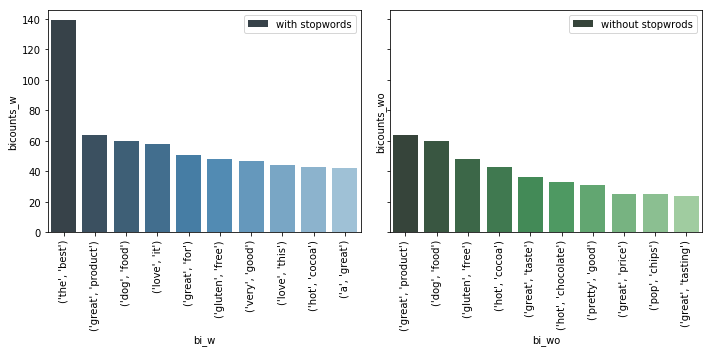

In [125]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey = True,figsize = (10,5))

sns.barplot(x = bi_fd_w['bi_w'][:10],
            y =bi_fd_w['bicounts_w'][:10], 
            palette='Blues_d',
            ax = ax1, 
            label = 'with stopwords') 

sns.barplot(x = bi_fd_wo['bi_wo'][:10],
            y =bi_fd_wo['bicounts_wo'][:10], 
            palette='Greens_d', 
            ax = ax2, 
            label = 'without stopwrods') 

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=90)


ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

### 4.4 建模
* 数据预处理
* tfidf处理，转化成频率
* 调用具体模型

#### 4.4.1 Data Preprocessing数据预处理

In [126]:
def stem_tokens(tokens, stemmer = PorterStemmer()):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens)
    return ' '.join(stems)

def build_corpus(dataset):
    corpus = []
    for text in dataset:
        # without the decoding, there will be UnicodeDecodeError when tokenizing
        corpus.append(tokenize(text))  
    return corpus

In [127]:
# 在第二步时已经去除了标点
n=10000
X = summary[:n]
y = label[:n]



* 分成训练集合测试集
* seed = 2018
* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [129]:
seed = 2018
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

* 建语料库

In [131]:
train_token = build_corpus(X_train)
test_token = build_corpus(X_test)

In [132]:
train_token[:10]

['thi gadget just doesnt do the job',
 'more hotspici than mccormick brand',
 'realli good juic',
 'quit good',
 'hot',
 'not healthi but they tast good',
 'the best gluten free bake mix',
 'highli recommend cat food',
 'love it',
 'unremark']

#### 4.4.2 进一步处理，计算单词出现的tf-idf频率：sklearn TfidfVectorizer (会用就行)


* 什么是TF-IDF？
* TF: term frequency 具体单词在某篇文章中的出现次数 
* $TF_{词i,文章j} = \frac{词i在文章j中的频率}{文章j中所有词的频率总和}$
* IDF: inversed document frequency 
* $IDF_{词i} = log \frac{所有文章的篇数总和}{带有词汇i的文章篇数总和}$


In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()

X_train_tfidf_vec = tfidf_vec.fit_transform(train_token)
X_test_tfidf_vec = tfidf_vec.transform(test_token)

In [134]:
for item in X_test_tfidf_vec:

    print(item)

    print("---")

  (0, 2421)	0.8063735355482615
  (0, 1321)	0.36899641849251724
  (0, 446)	0.46217244001248253
---
  (0, 1598)	0.9170449091350398
  (0, 1358)	0.3987839447990687
---
  (0, 3418)	0.4857105404231183
  (0, 3023)	0.3485237243164017
  (0, 2786)	0.5470623667004327
  (0, 2575)	0.5859515777354204
---
  (0, 3269)	0.41604673300561223
  (0, 2358)	0.47236916921540756
  (0, 1358)	0.20391729684751483
  (0, 839)	0.30310881662338945
  (0, 816)	0.410210842670435
  (0, 648)	0.2605527334943865
  (0, 335)	0.4838952395776263
---
  (0, 3283)	0.5650617206005771
  (0, 1420)	0.8250486360887552
---
  (0, 1358)	0.3692541421120669
  (0, 1193)	0.5770008304135346
  (0, 250)	0.7285062938885107
---
  (0, 691)	0.7148422849515081
  (0, 620)	0.6992857124561511
---
  (0, 3164)	0.4446700143852571
  (0, 2994)	0.35511560704310774
  (0, 1481)	0.3257822680900299
  (0, 1234)	0.41150711623184216
  (0, 1110)	0.3482690976199723
  (0, 717)	0.3482690976199723
  (0, 701)	0.3515699890245728
  (0, 175)	0.18575549825749849
---
  (0, 2529

  (0, 323)	0.30823276142855016
---
  (0, 2103)	0.40087436614502825
  (0, 1630)	0.5647609137571875
  (0, 1420)	0.4890928949209789
  (0, 779)	0.5302197591544326
---
  (0, 3138)	0.6165850810306808
  (0, 1071)	0.7872882812860795
---
  (0, 2109)	0.7071067811865476
  (0, 125)	0.7071067811865476
---
  (0, 2434)	0.43764357701250667
  (0, 2069)	0.4134425833330023
  (0, 1831)	0.3965045659884837
  (0, 1631)	0.40487485287449626
  (0, 1358)	0.3067038307616511
  (0, 920)	0.4715151881359703
---
  (0, 3066)	0.3055117716747093
  (0, 2718)	0.5811579304573307
  (0, 1625)	0.38533598425330673
  (0, 722)	0.6484089731598939
---
  (0, 3078)	0.31125378206812415
  (0, 1637)	0.46979714422458135
  (0, 394)	0.5430155727599881
  (0, 312)	0.6225317776361771
---
  (0, 3075)	0.5990348923875187
  (0, 1831)	0.4699107679030357
  (0, 591)	0.6483371560469544
---
  (0, 2417)	0.31355460005758834
  (0, 1490)	0.5800068551989696
  (0, 1083)	0.4736213374951764
  (0, 839)	0.28202641479599144
  (0, 755)	0.45023843606796105
  (0, 1

  (0, 3378)	0.48497125372379196
  (0, 2376)	0.45960367645287004
  (0, 250)	0.4394274877930391
  (0, 169)	0.6003922273185067
---
  (0, 2812)	0.8014317305025355
  (0, 816)	0.5980862658042828
---
  (0, 3274)	0.4315931701772769
  (0, 3066)	0.1783626587598138
  (0, 2175)	0.2757429600726964
  (0, 1916)	0.39097517931536907
  (0, 1526)	0.26535980554541494
  (0, 1450)	0.2862476542533668
  (0, 1364)	0.4787965960631365
  (0, 1358)	0.15662576693529193
  (0, 1305)	0.3328414188985227
  (0, 1201)	0.19000936602538476
---
  (0, 2137)	0.6561283562709822
  (0, 311)	0.7546493093464932
---
  (0, 3178)	0.5921596351588405
  (0, 2292)	0.387083416269163
  (0, 1201)	0.26069892815064366
  (0, 488)	0.6569242454035688
---
  (0, 3075)	0.575174781741564
  (0, 3023)	0.4520031366272331
  (0, 1321)	0.3789808713494084
  (0, 578)	0.5667809401161354
---
  (0, 1960)	0.65285100399351
  (0, 1306)	0.7574863474576068
---
  (0, 3066)	0.2423478254516572
  (0, 2602)	0.5628694931085374
  (0, 2507)	0.4444583411316528
  (0, 1164)	0.

---
  (0, 3406)	0.35099387341764965
  (0, 1590)	0.6492612536307434
  (0, 351)	0.5185031523463454
  (0, 174)	0.4317610523935814
---
  (0, 1790)	0.7732070894273069
  (0, 1631)	0.6341536066753485
---
  (0, 1526)	0.5791563506319738
  (0, 839)	0.5081224655907197
  (0, 644)	0.6374868480875994
---
  (0, 1096)	0.7498255431957854
  (0, 97)	0.6616355906170295
---
  (0, 3023)	0.3439841634137662
  (0, 2040)	0.6908252799437291
  (0, 1576)	0.4096271944181381
  (0, 258)	0.4864574899251985
---
  (0, 2963)	0.7710449493869121
  (0, 2678)	0.6367807205191862
---
  (0, 1358)	0.616320373754854
  (0, 648)	0.7874955218251573
---
  (0, 3023)	0.41641938172643694
  (0, 1358)	0.3215315599069906
  (0, 1237)	0.8504189288264633
---
  (0, 2175)	0.3586503923396104
  (0, 2069)	0.27461616165595304
  (0, 2064)	0.5149156548814097
  (0, 1437)	0.37814372101980415
  (0, 498)	0.6227560151803757
---
  (0, 3023)	0.30187586160605767
  (0, 2177)	0.41655595205067175
  (0, 2153)	0.3253913882048884
  (0, 1827)	0.5102156668935356
  (

---
  (0, 3379)	0.2852714140832253
  (0, 3185)	0.2820008298797723
  (0, 3090)	0.27361330862358485
  (0, 3031)	0.1883380169366828
  (0, 2786)	0.2323186627812887
  (0, 2590)	0.24513341354676693
  (0, 1201)	0.13863857196775234
  (0, 1024)	0.2667602047625767
  (0, 945)	0.3080548506048728
  (0, 801)	0.25754654021788387
  (0, 670)	0.29724145499696797
  (0, 378)	0.26890867559325493
  (0, 175)	0.29187301899932927
  (0, 174)	0.2323186627812887
  (0, 74)	0.2515195796453811
---
  (0, 839)	1.0
---
  (0, 3283)	0.6665091589249086
  (0, 1321)	0.48276994352238717
  (0, 648)	0.568065773216977
---
  (0, 3023)	0.5860568659387883
  (0, 246)	0.8102699240907348
---
  (0, 2163)	0.5843899487438181
  (0, 1631)	0.3485477292887362
  (0, 1201)	0.3203114425151018
  (0, 397)	0.659092897859443
---
  (0, 1174)	1.0
---
  (0, 3063)	0.39448726051171734
  (0, 2723)	0.5869642393969557
  (0, 928)	0.6025979347823712
  (0, 326)	0.369768186786174
---
  (0, 3283)	0.4455716552774337
  (0, 2417)	0.4911751454648797
  (0, 1358)	0.

  (0, 948)	0.41504599873729603
---
  (0, 1437)	0.44203643734541975
  (0, 727)	0.543804622572053
  (0, 326)	0.41339052452079217
  (0, 310)	0.5813678652666141
---
  (0, 2245)	0.5767969141347904
  (0, 1790)	0.46612150696882865
  (0, 142)	0.6708472706851324
---
  (0, 3453)	0.6697197011463392
  (0, 2434)	0.3613142769783891
  (0, 834)	0.6487892686751547
---
  (0, 1584)	0.6296910763206368
  (0, 1321)	0.24170373338203655
  (0, 834)	0.5703219458840791
  (0, 407)	0.46882974704506614
---
  (0, 3461)	0.6549480409022157
  (0, 2069)	0.3720536490472876
  (0, 1683)	0.4824456734392495
  (0, 1114)	0.4470629912313211
---
  (0, 1114)	1.0
---
  (0, 3255)	0.742780438128892
  (0, 2124)	0.3726225926708639
  (0, 1201)	0.36098260864556203
  (0, 1164)	0.42322710265262986
---
  (0, 3467)	0.5647859364861699
  (0, 3078)	0.23279127078869385
  (0, 2124)	0.20610139560922247
  (0, 1625)	0.23639515722688975
  (0, 1560)	0.3310848435539036
  (0, 1201)	0.19966320050331593
  (0, 486)	0.35475260117129936
  (0, 463)	0.5031228

  (0, 3259)	0.32996175235095465
  (0, 3078)	0.2365571776370585
  (0, 2533)	0.4126993428049616
  (0, 2331)	0.46085788438116204
  (0, 2153)	0.23347515022005275
  (0, 2008)	0.47313275786882864
  (0, 1576)	0.257936812524859
  (0, 927)	0.3279612095227491
---
  (0, 3468)	0.49725526590931673
  (0, 2590)	0.42199141676167895
  (0, 1046)	0.3264901243011416
  (0, 948)	0.384635146037117
  (0, 801)	0.4433603229201511
  (0, 648)	0.2513708715729599
  (0, 323)	0.245692402928024
---
  (0, 2897)	0.6078267408122853
  (0, 2611)	0.6568108178923118
  (0, 1046)	0.3565735461449831
  (0, 323)	0.2683309688476884
---
  (0, 2162)	0.8335393210035095
  (0, 1631)	0.5524601346169771
---
  (0, 3063)	0.42982202898796684
  (0, 2805)	0.4622561808222183
  (0, 2533)	0.5727091021214634
  (0, 880)	0.5230454387866807
---
  (0, 2261)	0.6504545200658765
  (0, 2202)	0.5002183022695076
  (0, 1631)	0.3397132846102812
  (0, 323)	0.3213877156999767
  (0, 175)	0.32862651727595993
---
  (0, 3413)	0.45251268248176135
  (0, 2762)	0.4889

---
  (0, 3075)	0.3314438104508431
  (0, 2124)	0.2518482285464366
  (0, 1576)	0.3101714766925702
  (0, 983)	0.41032903467938864
  (0, 916)	0.4273840911380427
  (0, 711)	0.3943764818205184
  (0, 304)	0.4732348654381443
---
  (0, 2737)	0.44053809142575023
  (0, 1868)	0.29040457440868195
  (0, 1805)	0.3035702292931716
  (0, 976)	0.4760405633937465
  (0, 902)	0.41977047664156847
  (0, 414)	0.4760405633937465
---
  (0, 2124)	0.6468975724074452
  (0, 1358)	0.5165838430229734
  (0, 1321)	0.5609497873615519
---
  (0, 2434)	0.669671649703568
  (0, 1059)	0.7426573110010443
---
  (0, 2645)	1.0
---
  (0, 1283)	0.8873212537354337
  (0, 1201)	0.46115181087075685
---
  (0, 3283)	0.5193477698674429
  (0, 3031)	0.5709195562048504
  (0, 2509)	0.635868503919301
---
  (0, 3170)	1.0
---
  (0, 3066)	0.23190057186421584
  (0, 1637)	0.434747695853348
  (0, 1403)	0.4368087481627875
  (0, 1171)	0.6225137324466582
  (0, 1046)	0.33795413086336806
  (0, 323)	0.25431936928875265
---
  (0, 2816)	0.40657270513131427


查看结果

for item in X_test_tfidf_vec:

    print(item)
    
    print("---")

X_train_tfidf_vec的大小 X_train_tfidf_vec.shape


In [135]:
X_train_tfidf_vec.shape

(8000, 3503)

有哪些词语？tfidf_vec.get_feature_names()

In [136]:
tfidf_vec.get_feature_names()

['10',
 '100',
 '100calori',
 '100count',
 '102012',
 '10lb',
 '10oz',
 '11',
 '12',
 '125pound',
 '13',
 '136',
 '14',
 '144',
 '15',
 '15ounc',
 '15ouncepack',
 '169oz',
 '16bit',
 '16ounc',
 '17oz',
 '18',
 '180',
 '1825',
 '18lb',
 '19',
 '1960',
 '1st',
 '20',
 '2009',
 '2012',
 '20pound',
 '21',
 '21lb',
 '24',
 '25',
 '26',
 '28',
 '29g',
 '2nd',
 '2x',
 '30',
 '3000',
 '338',
 '35',
 '35mg',
 '36g',
 '3kg',
 '3pkg',
 '3rd',
 '3x',
 '4000000',
 '44',
 '449',
 '46',
 '47',
 '48khz',
 '50',
 '54oz',
 '5star',
 '64',
 '65',
 '6flavor',
 '70',
 '78',
 '7yearold',
 '83',
 '850',
 '8ounc',
 '97',
 '9greenbox',
 'abl',
 'about',
 'abov',
 'absolut',
 'absolutel',
 'acaigrap',
 'accept',
 'accid',
 'accord',
 'acid',
 'acn',
 'acquir',
 'action',
 'activ',
 'actual',
 'acutu',
 'ad',
 'add',
 'addict',
 'addictedbut',
 'addit',
 'adequ',
 'adjust',
 'ador',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'adzuki',
 'affect',
 'afford',
 'after',
 'afterburn',
 'aftertast',
 'again',
 'agar

#### 4.4.3 调用具体模型 train & predict

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#### 逻辑回归

In [138]:
lr = LogisticRegression().fit(X_train_tfidf_vec, y_train)
ypred_lr = lr.predict(X_test_tfidf_vec)

#### 与RandomForestClassifier对比

In [141]:
models = {}
models['lgr'] = LogisticRegression()
models['RF'] = RandomForestClassifier(n_estimators=50, max_depth= 10)

* 将结果保存在pd.DataFrame中

In [142]:
results = pd.DataFrame(index=models.keys(), columns=['f1_score','precision_score','recall_score','auc'])

for (clf_name, clf) in models.items():
    clf.fit(X_train_tfidf_vec, y_train)
    ypred = clf.predict(X_test_tfidf_vec)
    flscore = metrics.f1_score(y_test, ypred)
    precision = metrics.precision_score(y_test, ypred)
    recall = metrics.recall_score(y_test, ypred)
    auc = metrics.roc_auc_score(y_test, ypred)
    results.loc[clf_name, :] = [flscore, precision,recall,auc]

In [143]:
metrics.confusion_matrix(y_test,ypred_lr)

array([[ 239,  257],
       [  59, 1445]], dtype=int64)

In [144]:
results

,f1_score,precision_score,recall_score,auc
lgr,0.901435,0.849001,0.960771,0.721313
RF,0.858447,0.752,1,0.5
